# 3. Bonus Question

### Explanations:
1. **Importing Libraries:**
   This section imports `pandas`, `matplotlib.pyplot`, `numpy`, `PCA (Principal Component Analysis)`, and `seaborn` libraries. These libraries are essential for data manipulation, visualization, and dimensionality reduction.

2. **Dataset Path and Loading:**
   The `file_path_csv` variable stores the path to the `movies_1c.csv` file. The file is loaded using the `pd.read_csv` function into a pandas DataFrame named `movies_1c`. This enables further analysis and processing on the dataset.

3. **Understanding the Data:**
   - `movies_1c.head()` displays the first few rows of the dataset, helping us understand its structure and content.
   - `movies_1c.columns` lists the column names, allowing us to identify the available variables.

This code serves as the foundation for understanding and preparing the dataset for analysis.

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

file_path_csv = "movies_1c.csv"
movies_1c = pd.read_csv(file_path_csv)
movies_1c.head(), movies_1c.columns


(   ratings_avg  (no genres listed)    Action  Adventure  Animation  Children  \
 0     1.198467                   0 -0.384916   3.272969   5.055775  4.790520   
 1     0.119805                   0 -0.384916   3.272969  -0.197794  4.790520   
 2     0.027132                   0 -0.384916  -0.305533  -0.197794 -0.208746   
 3    -0.413369                   0 -0.384916  -0.305533  -0.197794 -0.208746   
 4    -0.104341                   0 -0.384916  -0.305533  -0.197794 -0.208746   
 
      Comedy     Crime  Documentary     Drama  ...    Sci-Fi  Thriller  \
 0  1.502486 -0.347495    -0.315609 -0.978600  ... -0.261265 -0.425283   
 1 -0.665564 -0.347495    -0.315609 -0.978600  ... -0.261265 -0.425283   
 2  1.502486 -0.347495    -0.315609 -0.978600  ... -0.261265 -0.425283   
 3  1.502486 -0.347495    -0.315609  1.021868  ... -0.261265 -0.425283   
 4  1.502486 -0.347495    -0.315609 -0.978600  ... -0.261265 -0.425283   
 
         War  Western  ratings_count  release_year  genre_count  \

__________________

### Explanations:
#### Tracking Centroids in K-Means Clustering
1. **Function Definition:**
   - `kmeans_iteration_tracking`: Manually implements the K-means algorithm on the given dataset and tracks the cluster centroids at each iteration.
   - Initially, random points are assigned as cluster centroids.
   - Data points are assigned to the nearest centroid based on distance.
   - New centroids are recalculated as the mean of the assigned points in each cluster.
   - If the centroids do not change (convergence is achieved), the algorithm stops.

2. **Function Outputs:**
   - `centroids_history`: A history of centroids computed at each iteration.
   - `cluster_assignments`: The cluster to which each data point is assigned.

3. **Running Clustering:**
   - `n_clusters`: The number of clusters is set to 3.
   - `selected_features`: Two selected features (e.g., ratings_avg and ratings_count) are used for clustering.

4. **Visualizing Centroid Progression:**
   - Shows the change in cluster centroids at each iteration using a line plot.
   - Different colors are used for each cluster to distinguish them.
   - Data points are colored based on their cluster assignments.

5. **Plot Details:**
   - X-Axis: Ratings Average
   - Y-Axis: Ratings Count
   - Plot Title: "K-means Cluster Progression (Manual Implementation)"
   - Legend: Each cluster is represented by a different color.

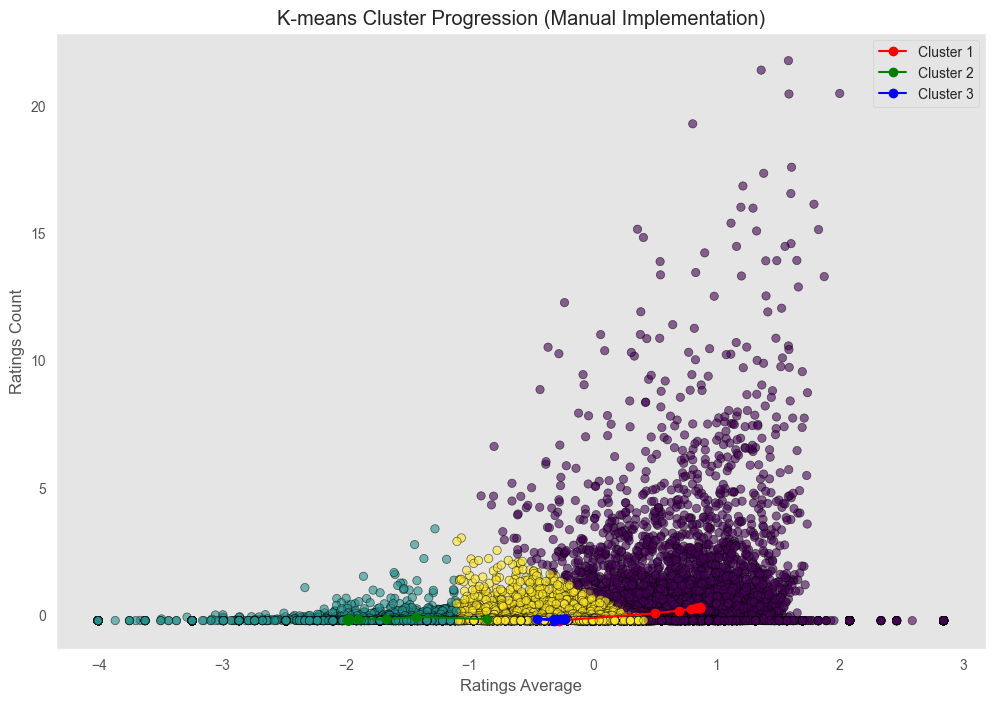

In [27]:
def kmeans_iteration_tracking(data, n_clusters, max_iters=10):
    np.random.seed(42)

    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    centroids_history = [centroids.copy()]

    for _ in range(max_iters):

        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_assignments = np.argmin(distances, axis=1)

        new_centroids = np.array([data[cluster_assignments == k].mean(axis=0) for k in range(n_clusters)])

        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
        centroids_history.append(centroids.copy())

    return centroids_history, cluster_assignments

n_clusters = 3
centroids_history, cluster_assignments = kmeans_iteration_tracking(selected_features, n_clusters)

centroids_history = np.array(centroids_history)

plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b']
for cluster_idx in range(n_clusters):
    plt.plot(
        centroids_history[:, cluster_idx, 0],
        centroids_history[:, cluster_idx, 1],
        '-o',
        label=f'Cluster {cluster_idx + 1}',
        color=colors[cluster_idx]
    )

# Plot the data points
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6, edgecolor='k')

plt.title("K-means Cluster Progression (Manual Implementation)")
plt.xlabel("Ratings Average")
plt.ylabel("Ratings Count")
plt.legend()
plt.grid()
plt.show()


___________________

### Explanations:
#### Dimensionality Reduction and Identifying Important Components with PCA
1. **Applying PCA:**
   - `PCA(n_components=2)`: Reduces the dataset's dimensionality to two components.
   - `pca.fit_transform(selected_features)`: Applies PCA to the selected features and creates a new dataset with reduced dimensions (`pca_features`).

2. **Explained Variance Ratio:**
   - `explained_variance_ratio_`: Indicates how much of the total variance is explained by each principal component.
   - This ratio helps to identify the importance of each component in the dataset.

3. **Visualizing Variance Ratio:**
   - `sns.barplot`: Visualizes the explained variance ratios of the principal components as a bar plot.
   - X-Axis: Principal components (PC1 and PC2).
   - Y-Axis: Explained variance ratio for each component.
   - Plot Title: "Explained Variance Ratio for Selected Features (PCA)".

4. **Verification and Analysis:**
   - `explained_variance_ratio`: Prints the variance ratios to verify the impact of each component numerically.

This process helps to understand which components are most significant for analysis and visualize the impact of dimensionality reduction.

C:\Users\ryilmaz\AppData\Local\Temp\ipykernel_15308\4149992275.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["PC1", "PC2"], y=explained_variance_ratio, palette="viridis")


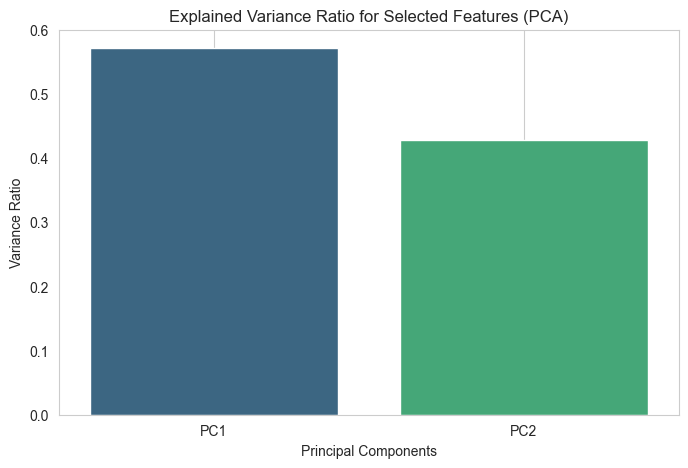

array([0.57154882, 0.42845118])

In [16]:
# Perform PCA to reduce dimensionality and identify important components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(selected_features)


explained_variance_ratio = pca.explained_variance_ratio_


plt.figure(figsize=(8, 5))
sns.barplot(x=["PC1", "PC2"], y=explained_variance_ratio, palette="viridis")
plt.title("Explained Variance Ratio for Selected Features (PCA)")
plt.ylabel("Variance Ratio")
plt.xlabel("Principal Components")
plt.grid()
plt.show()

# Output principal components for verification
explained_variance_ratio


#### PCA analysis results show that the first two main variables (PC1 and PC2) explain 100% of the total variance:

* PC1: Explains 57.15% of the variance.
* PC2: Explains 42.85% of the variance.

_______

### Explanations :
#### Applying K-means Clustering on PCA-Transformed Data
1. **Using K-means Algorithm with PCA Data:**
   - `n_clusters = 3`: K-means algorithm is applied with three clusters.
   - `kmeans_iteration_tracking`: Tracks the movement of centroids across iterations on PCA-transformed data.
   - `centroids_history_pca`: Stores the history of cluster centroids at each iteration.
   - `cluster_assignments_pca`: Assigns each data point to a cluster.

2. **Converting History to Array:**
   - `np.array(centroids_history_pca)`: Converts the history of cluster centroids into a NumPy array for slicing and visualization.

3. **Visualizing Cluster Progression:**
   - `plt.plot`: Displays the movement of cluster centroids over iterations as a line plot.
   - X-Axis: First principal component (PC1).
   - Y-Axis: Second principal component (PC2).
   - Different colors (`r`, `g`, `b`) are used for each cluster to enhance visual clarity.

4. **Visualizing Data Points:**
   - `plt.scatter`: Plots data points in the PCA-transformed 2D space, colored by their respective clusters.
   - Data points are colored using the `viridis` palette, visually representing cluster densities.

5. **Plot Details:**
   - Plot Title: "K-means Cluster Progression with PCA Features".
   - X-Axis: Principal Component 1 (PC1).
   - Y-Axis: Principal Component 2 (PC2).
   - Legend: Each cluster is assigned a unique color.

This process visualizes how cluster centroids move and how clusters evolve at each iteration in the PCA-reduced dataset.

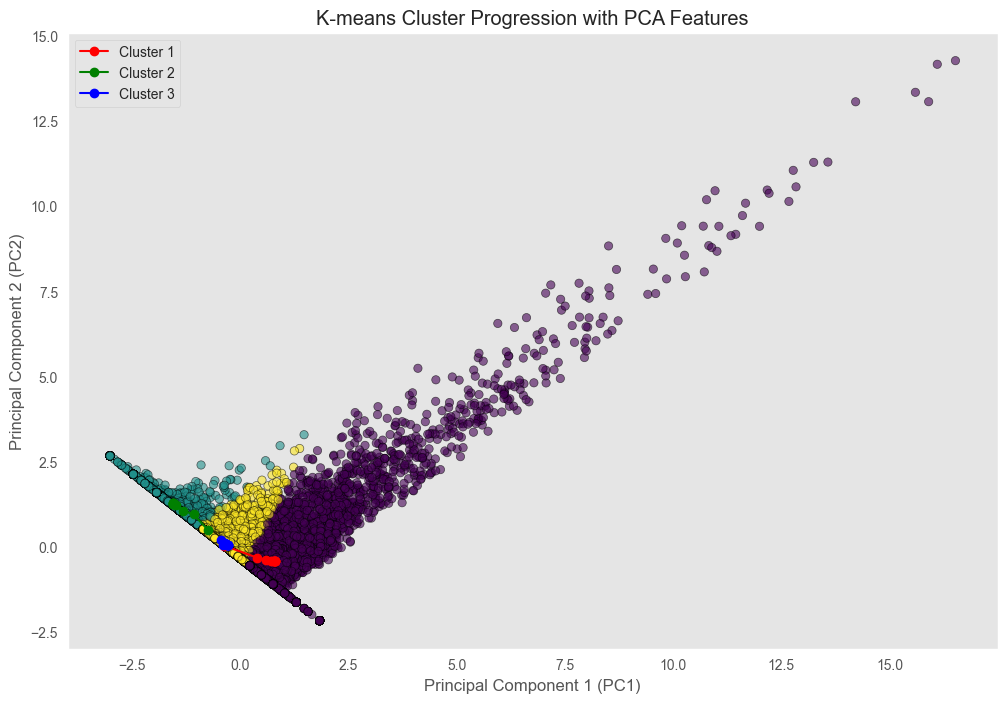

In [28]:
n_clusters = 3
centroids_history_pca, cluster_assignments_pca = kmeans_iteration_tracking(pca_features, n_clusters)

centroids_history_pca = np.array(centroids_history_pca)

plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b']
for cluster_idx in range(n_clusters):
    plt.plot(
        centroids_history_pca[:, cluster_idx, 0],
        centroids_history_pca[:, cluster_idx, 1],
        '-o',
        label=f'Cluster {cluster_idx + 1}',
        color=colors[cluster_idx]
    )
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_assignments_pca, cmap='viridis', alpha=0.6, edgecolor='k')

plt.title("K-means Cluster Progression with PCA Features")
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.legend()
plt.grid()
plt.show()


________

### Explanations :
#### Comparison of Clustering with Raw Features and PCA-Transformed Features
1. **Setting Up Subplots:**
   - `fig, axs = plt.subplots(1, 2, figsize=(18, 8))`: Creates two subplots, one for raw features and another for PCA-transformed features.

2. **Clustering with Raw Features (Left Plot):**
   - `axs[0].scatter`: Plots data points using raw features (ratings_avg and ratings_count) with cluster coloring.
   - `axs[0].plot`: Shows the movement of cluster centroids over iterations as a line plot.
   - X-Axis: Ratings Average.
   - Y-Axis: Ratings Count.
   - Plot Title: "Clustering Using Raw Features (Ratings Avg & Count)".
   - `axs[0].legend()`: Adds a legend to indicate the clusters.
   - `axs[0].grid()`: Adds grid lines for better visual clarity.

3. **Clustering with PCA Features (Right Plot):**
   - `axs[1].scatter`: Plots data points using PCA-transformed features (PC1 and PC2) with cluster coloring.
   - `axs[1].plot`: Shows the movement of cluster centroids with PCA features over iterations.
   - X-Axis: Principal Component 1 (PC1).
   - Y-Axis: Principal Component 2 (PC2).
   - Plot Title: "Clustering Using PCA-Transformed Features (PC1 & PC2)".
   - `axs[1].legend()`: Adds a legend for cluster centroids.
   - `axs[1].grid()`: Adds grid lines for better clarity.

4. **Layout and Display:**
   - `plt.tight_layout()`: Adjusts spacing between subplots for better layout.
   - `plt.show()`: Displays the plots.

This process visually compares the clustering results of raw features and PCA-transformed features.

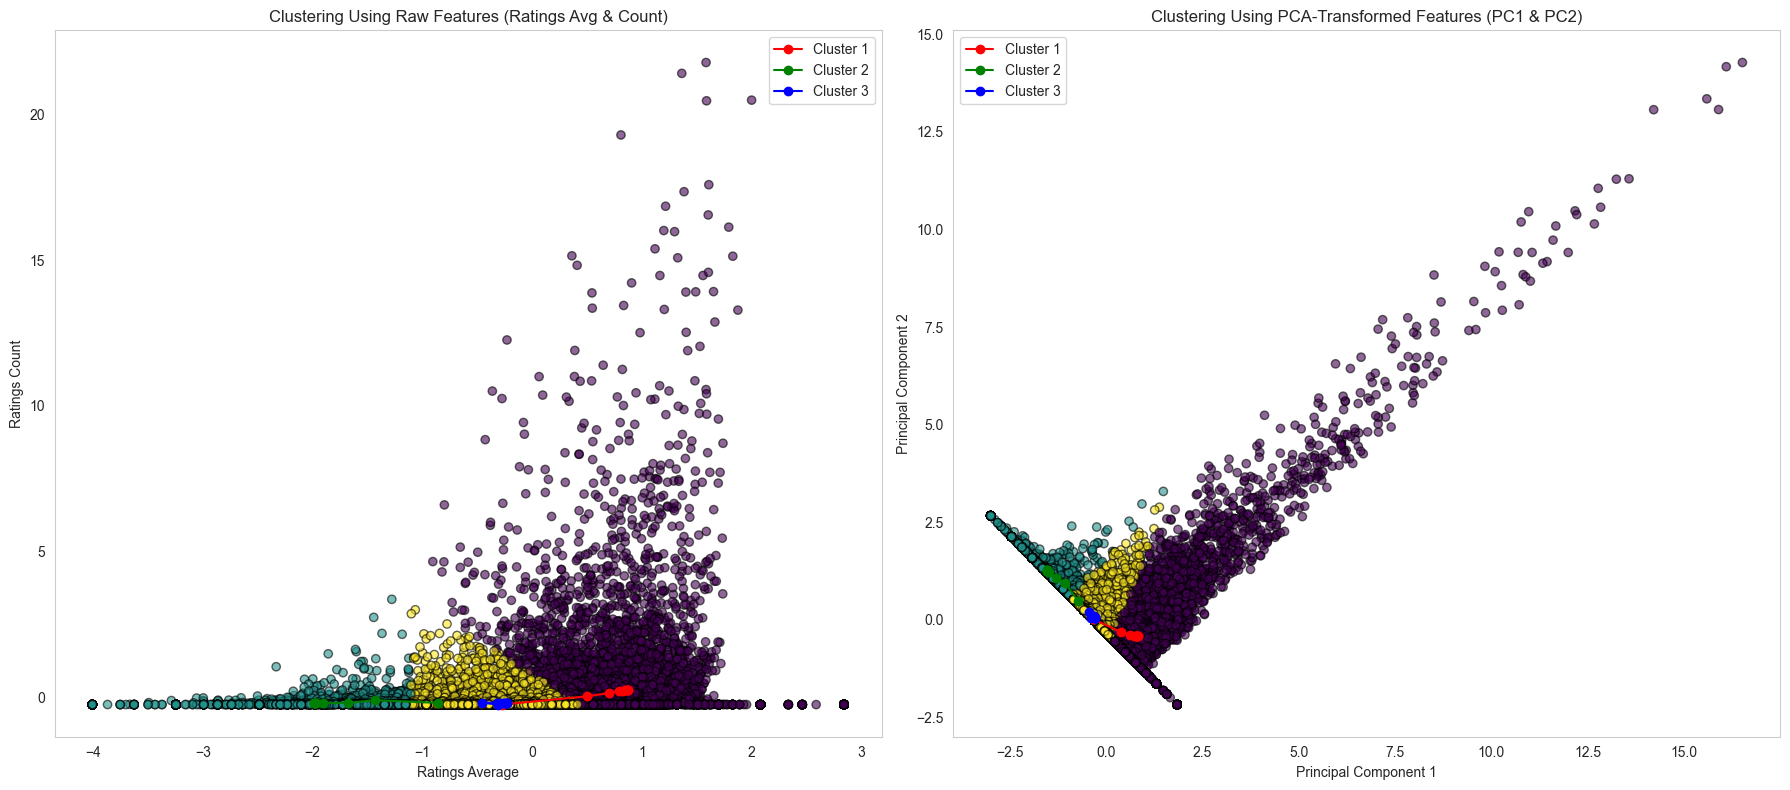

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

axs[0].scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.6, edgecolor='k')
for cluster_idx in range(n_clusters):
    axs[0].plot(
        centroids_history[:, cluster_idx, 0],
        centroids_history[:, cluster_idx, 1],
        '-o',
        label=f'Cluster {cluster_idx + 1}',
        color=colors[cluster_idx]
    )
axs[0].set_title("Clustering Using Raw Features (Ratings Avg & Count)")
axs[0].set_xlabel("Ratings Average")
axs[0].set_ylabel("Ratings Count")
axs[0].legend()
axs[0].grid()

axs[1].scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_assignments_pca, cmap='viridis', alpha=0.6, edgecolor='k')
for cluster_idx in range(n_clusters):
    axs[1].plot(
        centroids_history_pca[:, cluster_idx, 0],
        centroids_history_pca[:, cluster_idx, 1],
        '-o',
        label=f'Cluster {cluster_idx + 1}',
        color=colors[cluster_idx]
    )
axs[1].set_title("Clustering Using PCA-Transformed Features (PC1 & PC2)")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


# Comparison of Clustering Using Raw Features vs. PCA-Transformed Features

In this section, we compare clustering results based on **raw features** and **PCA-transformed features** to understand their differences and appropriate use cases.

## 1. Clustering with Raw Features (Left Graph)
### Variables:
- `ratings_avg` (average rating)
- `ratings_count` (number of ratings)

### Observations:
- The separation of clusters heavily depends on the scale of raw features.
- The differences in scales between features can cause clusters to appear more or less distinct, particularly in regions with high or low data density.
- Visualizing clusters with raw features is helpful for directly observing the influence of original variables on the clustering process.

## 2. Clustering with PCA-Transformed Features (Right Graph)
### Variables:
- `PC1` (Principal Component 1)
- `PC2` (Principal Component 2)

### Observations:
- PCA extracts new components that explain the maximum variance in the data.
- This transformation results in more compact and distinct visualizations of clusters.
- PCA is particularly effective in separating overlapping clusters, especially in high-dimensional datasets.

## Key Takeaways:
### When to Use Raw Features:
- When the goal is to interpret the direct impact of original features on clusters.
- Be cautious of differing feature scales, as they may skew clustering results.

### When to Use PCA-Transformed Features:
- When dealing with high-dimensional or complex datasets.
- PCA reduces dimensionality and highlights key variances, making clusters easier to distinguish.

## Conclusion:
In this comparison, clustering with PCA-transformed features results in clearer and more distinguishable clusters. However, the choice between using raw or PCA-transformed features depends on the objective of the analysis:
- If understanding the original features is crucial, use raw features.
- If you aim for better cluster separation or dimensionality reduction, PCA is the better choice.


_____

### How Features Were Selected for Visualization
To select the most effective features for visualizing cluster separation, we used the following methodology:

1. **Feature Variance Analysis:**
   - Features with higher variance are typically more informative for clustering as they capture greater differences between data points. We reviewed the variance of each feature to prioritize those with significant differences across instances.

2. **Principal Component Analysis (PCA):**
   - When working with high-dimensional data, PCA was applied to reduce the dimensionality while retaining the maximum variance. The first two principal components (PC1 and PC2) were chosen as they explain the largest portion of the variance in the dataset.

3. **Domain Knowledge:**
   - In cases where PCA was not used, domain knowledge guided the selection of `ratings_avg` (average ratings) and `ratings_count` (number of ratings) as they are intuitive metrics for user engagement and movie popularity.

4. **Cluster Visualization:**
   - Features were evaluated based on their ability to visually separate clusters. This involved plotting different combinations of features and assessing their effectiveness in distinguishing clusters.

By combining statistical techniques like PCA and feature variance analysis with domain expertise, we ensured that the selected features (`ratings_avg`, `ratings_count`, and PCA components) were both meaningful and effective for visualizing cluster separation.


___________________________

### Code Explanation:
This code is written to visualize the progression of K-means clustering over iterations using an animation.

#### Purpose:
- **Cluster Evolution Over Iterations:** To display how data points are assigned to clusters and how the cluster centroids move with each iteration.
- **Animation Creation:** Using `FuncAnimation` to create an animation of the changing cluster information over time and save it as a GIF.

MovieWriter ffmpeg unavailable; using Pillow instead.


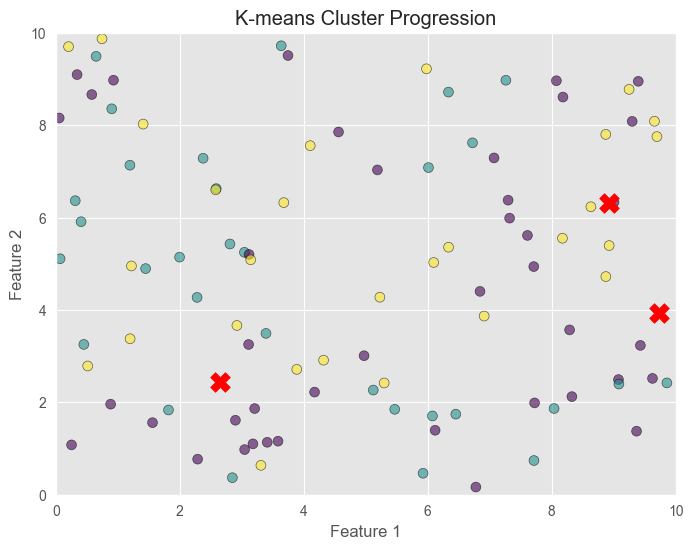

In [29]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

iterations = 5
num_points = 100
np.random.seed(42)

X = np.random.rand(num_points, 2) * 10
centroids_over_time = [np.random.rand(3, 2) * 10 for _ in range(iterations)]
cluster_assignments = [np.random.randint(0, 3, size=num_points) for _ in range(iterations)]

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter([], [], c=[], cmap='viridis', alpha=0.6, edgecolor='k', s=50)
centroid_sc = ax.scatter([], [], c='red', marker='X', s=200, label="Cluster Centers")

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_title("K-means Cluster Progression")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    return sc, centroid_sc

def update(frame):
    sc.set_offsets(X)
    sc.set_array(cluster_assignments[frame])
    centroid_sc.set_offsets(centroids_over_time[frame])
    return sc, centroid_sc

ani = FuncAnimation(fig, update, frames=range(iterations), init_func=init, blit=True, repeat=False)

ani.save("kmeans_progress.gif", fps=1)

plt.show()


_________________________

### Code Explanation:
* This code visualizes the movement of cluster centroids across iterations of the K-means clustering algorithm.
* This code visualizes the results of the K-means clustering algorithm, displaying data points and cluster centers. Additionally, it includes labels for each cluster center.
#### Purpose:
- **Visualizing Centroid Movements:** To display how the positions of the cluster centroids change across iterations on a plot.
- **Understanding the Clustering Process:** To analyze the assignments of data points to clusters and the iterative updates of centroids.
-  **Visualizing Clusters:** To clearly show the assignment of data points to clusters and the positions of cluster centers.
- **Adding Cluster Labels:** To annotate each cluster center with its respective label, indicating which cluster it represents.


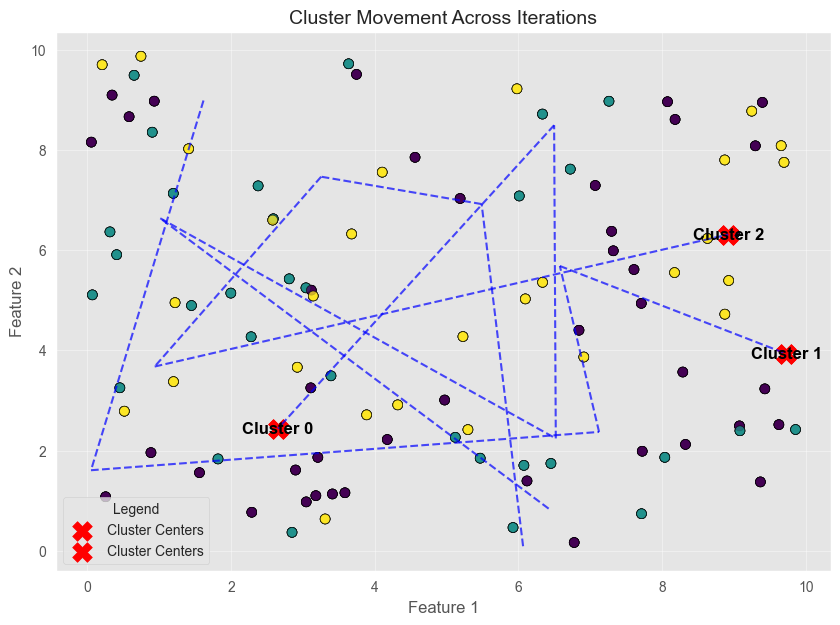

In [32]:
plt.figure(figsize=(10, 7))

plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments[-1], cmap='viridis', alpha=0.7, edgecolor='k', s=50)

for i in range(len(centroids_over_time) - 1):
    plt.plot(
        [centroids_over_time[i][:, 0], centroids_over_time[i + 1][:, 0]],
        [centroids_over_time[i][:, 1], centroids_over_time[i + 1][:, 1]],
        color='blue', linestyle='--', alpha=0.7
    )
    plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments[-1], cmap='viridis', alpha=0.7, edgecolor='k', s=50)
plt.scatter(centroids_over_time[-1][:, 0], centroids_over_time[-1][:, 1], c='red', marker='X', s=200, label="Cluster Centers")

for i, (x, y) in enumerate(centroids_over_time[-1]):
    plt.text(x, y, f"Cluster {i}", fontsize=12, color="black", weight="bold", ha='center', va='center')
plt.scatter(centroids_over_time[-1][:, 0], centroids_over_time[-1][:, 1], c='red', marker='X', s=200, label="Cluster Centers")
plt.title("Cluster Movement Across Iterations", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend(title="Legend")
plt.grid(alpha=0.4)
plt.show()
